# Occupancy Detection Problem Description


### This is a time series classification problem,

It is a binary classification problem which requires that an observation of environmental factors such as 
* temperature and humidity be used to classify whether a room is occupied or unoccupied.

Features present inside a data set :

* Temperature in Celsius.
* Relative humidity as a percentage.
* Light measured in lux.
* Carbon dioxide measured in parts per million.
* Humidity ratio, derived from temperature and relative humidity measured in kilograms of water vapor per kilogram of air.
* Occupancy as either 1 for occupied or 0 for not occupied.

In [2]:
# Preaping our tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [25]:
# Loading all data
# header = 0, Row number(s) to use as the column names
# index_col = 1, Column(s) to use as the row labels of the DataFrame, 
data1 = pd.read_csv('data/datatest.txt', header=0, index_col = 1, parse_dates=True, squeeze=True) 
data2 = pd.read_csv('data/datatraining.txt', header = 0, index_col = 1, parse_dates=True, squeeze= True)
data3 = pd.read_csv('data/datatest2(val).txt',header=0,index_col=0, parse_dates=True, squeeze=True)

In [26]:
data3.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
no,,,,,,,
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [27]:
data1.head()

,no,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-02 14:19:00,140,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,141,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,142,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,143,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,144,23.7540,26.200,488.600000,779.000000,0.004767,1


In [28]:
data2.head()

,no,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-04 17:51:00,1,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,2,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,3,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,4,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,5,23.10,27.2000,426.0,704.50,0.004757,1


# Visualizing the data


In [33]:
# Determine the number of features
n_features = data1.columns.nunique()
n_features

7

<AxesSubplot:>

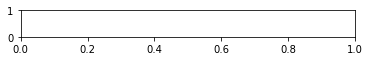

In [37]:
plt.subplot(n_features,1,1)

In [38]:
data1.index

DatetimeIndex(['2015-02-02 14:19:00', '2015-02-02 14:19:59',
               '2015-02-02 14:21:00', '2015-02-02 14:22:00',
               '2015-02-02 14:23:00', '2015-02-02 14:23:59',
               '2015-02-02 14:25:00', '2015-02-02 14:25:59',
               '2015-02-02 14:26:59', '2015-02-02 14:28:00',
               ...
               '2015-02-04 10:34:00', '2015-02-04 10:34:59',
               '2015-02-04 10:36:00', '2015-02-04 10:37:00',
               '2015-02-04 10:38:00', '2015-02-04 10:38:59',
               '2015-02-04 10:40:00', '2015-02-04 10:40:59',
               '2015-02-04 10:41:59', '2015-02-04 10:43:00'],
              dtype='datetime64[ns]', name='date', length=2665, freq=None)

In [43]:
data1.head()

,no,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-02 14:19:00,140,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,141,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,142,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,143,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,144,23.7540,26.200,488.600000,779.000000,0.004767,1


In [48]:
data1.values[:,1]

array([23.7       , 23.718     , 23.73      , ..., 24.33      ,
       24.35666667, 24.40833333])

In [ ]:
plt.plot(data1.index, data1.values[:,i])

7


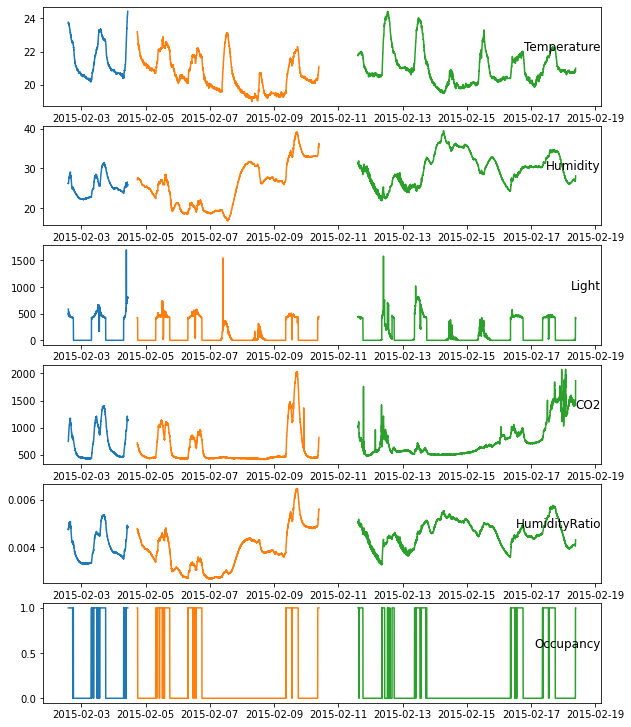

In [64]:
n_features = data1.values.shape[1]
print(n_features)
plt.figure(figsize=(10,15))
for i in range(1,n_features):
    # Specify the subplot
    plt.subplot(n_features,1,i)
    
    # Plot data from each dataset
    plt.plot(data1.index, data1.values[:,i])
    plt.plot(data2.index, data2.values[:,i])
    plt.plot(data3.index, data3.values[:,i])
    
    # Add a readable name to the plot
    plt.title(data1.columns[i], y = 0.5, loc = 'right')
plt.show()

We can see the small gap between the test and train sets and the larger gap between the train and validation sets.

# Concatenate the dataset
Simplify the dataset by preserving the temporal consistency of the data and concatenating all three sets into a single dataset, dropping the “no” column.

In [66]:
# Vertical stack and maintain temporal order
data = pd.concat([data1,data2,data3])

# Drop row number i.e 'no'
data.drop('no', axis = 1, inplace=True)

#Saving aggreagated dataset
data.to_csv('data/combine.csv')

# Model prediction
 this is not sequence classification, it is just a straight classification problem where the observations are temporally ordered.
 
 We will use the combined dataset described in the previous section and evaluate model skill by holding back the last 30% of the data as a test set

In [68]:
# Load the combine dataset
data = pd.read_csv('data/combine.csv')


In [71]:
data.head(2)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.700,26.272,585.2,749.2,0.004764,1
1,2015-02-02 14:19:59,23.718,26.290,578.4,760.4,0.004773,1


In [79]:
# Setup the seed
np.random.seed(42)



# Creating X and y
X = data.drop('Occupancy', axis = 1)
y = data['Occupancy']

In [73]:
# Spliting the data into train and test set
from sklearn.model_selection import train_test_split

# As we need sequence of data, we disable the shuffle
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle=False)

# Model selection

## Navie Model
A simple model for this formulation of the problem is to predict the most prominent class outcome.

This is called the Zero Rule, or the naive prediction algorithm. We will evaluate predicting all 0 (unoccupied) and all 1 (occupied) for each example in the test set and evaluate the approach using the accuracy metric.

In [ ]:
from sklearn.metrics 

In [76]:
# Makre a naive prediction each class value
def navie_prediction(X_test, value):
    return [value for x in range(len(X_test))]

In [77]:
from sklearn.metrics import accuracy_score

# Evaluate skill of predicting each class value
for value in [0, 1]:
    # Forecast
    pred = navie_prediction(X_test,value)
    
    # evaluate
    score = accuracy_score(y_test,pred)
    
    # summarize
    print('Naive=%d score = %.3f' %(value, score))

Naive=0 score = 0.822
Naive=1 score = 0.178


For any model to be considered skilful on the problem, it must achieve a skill of 82% or better.

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

# Setup seed
np.random.seed(42)

# Model instance
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the test set
preds = model.predict(X_test)

# Evaluate the model
score = accuracy_score(y_test,preds)
print(score)

ValueError: could not convert string to float: '2015-02-02 14:19:00'

In [82]:
data = read_csv('data/combine.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = data.values
# split data into inputs and outputs
X, y = values[:, :-1], values[:, -1]

In [84]:
# logistic regression
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# load the dataset
# data = read_csv('combined.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# values = data.values
# # split data into inputs and outputs
# X, y = values[:, :-1], values[:, -1]
# split the dataset
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=1)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(trainX, trainy)
# predict the test set
yhat = model.predict(testX)
# evaluate model skill
score = accuracy_score(testy, yhat)
print(score)

0.992704280155642


# Feature Selection
A closer look at the time series plot shows a clear relationship between the times when the rooms are occupied and peaks in the environmental measures.

This makes sense and explains why this problem is in fact so easy to model.

We can further simplify the model by testing a simple logistic regression model on each environment measure in isolation. The idea is that we don’t need all of the data to predict occupancy; that perhaps just one of the measures is sufficient.

This is the simplest type of feature selection where a model is created and evaluated with each feature in isolation. More advanced methods may consider each subgroup of features.

In [86]:
# logistic regression feature selection
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# load the dataset
data = read_csv('data/combine.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = data.values
# basic feature selection
features = [0, 1, 2, 3, 4]
for f in features:
	# split data into inputs and outputs
	X, y = values[:, f].reshape((len(values), 1)), values[:, -1]
	# split the dataset
	trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=1)
	# define the model
	model = LogisticRegression()
	# fit the model on the training set
	model.fit(trainX, trainy)
	# predict the test set
	yhat = model.predict(testX)
	# evaluate model skill
	score = accuracy_score(testy, yhat)
	print('feature=%d, name=%s, score=%.3f' % (f, data.columns[f], score))

feature=0, name=Temperature, score=0.826
feature=1, name=Humidity, score=0.822
feature=2, name=Light, score=0.992
feature=3, name=CO2, score=0.760
feature=4, name=HumidityRatio, score=0.822


We can see that only the “Light” variable is required in order to achieve 99% accuracy on this dataset.

It is very likely that the lab rooms in which the environmental variables were recorded had a light sensor that turned internal lights on when the room was occupied.